# Bias Variance analysis

Alípio Jorge

March 2021

# Bias-Variance decomposition

- We want a function $\hat{f}(x)$ that approximates $f(x)$, 
  - A function that **estimates** $f(x)$.
  - Function estimation can be reduced to **parameter estimation**
      - Linear regression: hyperplane coefficients $\beta_i$
- The estimator will have some **error**. 
- The Mean Squared Error ($MSE$) can be decomposed in **Bias** and **Variance**
  - part of the error comes from our initial assumptions being too strict (**bias**)
  - part is because we rely on a sample to estimate it (**variance**)


# Bias-Variance decomposition

How does that work?

- Suppose we want to estimate $\theta$ from a sample $S$
- $MSE$ is defined in terms of expected value w.r.t. $S$

$$ MSE = \mathbb{E}[(\hat{\theta}_S-\theta)^2] = \mathbb{E}[\hat{\theta}_S^2]-2\theta \mathbb{E}[\hat{\theta}_S] + \theta^2$$

- MSE can be rewritten as

$$ MSE = (\mathbb{E}[\hat{\theta}_S]-\theta)^2 + (\mathbb{E}[\hat{\theta}_S-\mathbb{E}[\hat{\theta}_S]]^2) $$

- The **first part** accounts for the **squared bias** error
  - $(\mathbb{E}[\hat{\theta}_S]-\theta)^2$
  - the difference between the expected value of the parameter and the true value
- The **second part** accounts for the **variance** error
  - $\mathbb{E}[\hat{\theta}_S-\mathbb{E}[\hat{\theta}_S]]^2$
  - the difference between the values obtained with the sample and the "mean" of those values

# Bias-Variance decomposition

The Bias part:

- If the estimator converges to the true value, bias contributes zero to the error
- If not, we get some error from here

$$ Bias^2(\hat{\theta}_S,\theta) = (\mathbb{E}[\hat{\theta}_S]-\theta)^2$$

# Bias-Variance decomposition

The Variance part:

- If any sample always hits the correct value (that would be very strange), Variance is zero
- If the estimator is jumpy, the Variance error is high

$$ Var(\hat{\theta}_S) = \mathbb{E}[\hat{\theta}_S-\mathbb{E}[\hat{\theta}_S]]^2 $$

$$ Var(\hat{\theta}_S) = \mathbb{E}[\hat{\theta}_S^2-2\hat{\theta}_S\mathbb{E}[\hat{\theta}_S]+\mathbb{E}[\hat{\theta}_S]^2] $$

$$ Var(\hat{\theta}_S) = \mathbb{E}[\hat{\theta}_S^2]-\mathbb{E}^2[\hat{\theta}_S] $$

# Expressiveness vs Robust predictions


- The linear model approach has **high bias** and **low variance**
- The kNN approach has **low bias** and **high variance**
  + Especially if **$k$ is low**  
- Expressive models **fit better to the training** data
  + But may **pay a price** with unseen data (test data)
  + **Overfitting** -> Poor **generalization**
- This applies to both Regression and Classification


# Test vs train performance

- As models turn **more expressive**:
    - Train performance **increases**
    - Test performance:
        - increases while there is **underfitting**
        - reaches a peak
        - decreases due to **overfitting**

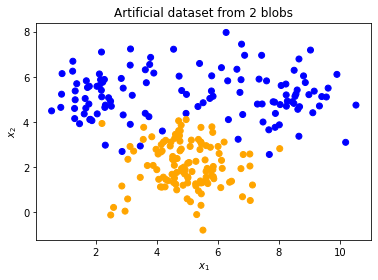

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

X,_ = make_blobs(n_samples=[50,20,50,120], centers=[(2,5),(5,6),(8,5),(5,2)], 
                 n_features=2, cluster_std=[1,1,1,1],
                 random_state=1, shuffle=False)

y=np.array([0]*120+[1]*120)

cmap = colors.ListedColormap(['blue','orange'])

bdb=[(0,0),(4,4),(6,4),(10,0)]
xbdb=np.array([x for (x,_) in bdb ])
ybdb=np.array([y for (_,y) in bdb ])

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.title('Artificial dataset from 2 blobs')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

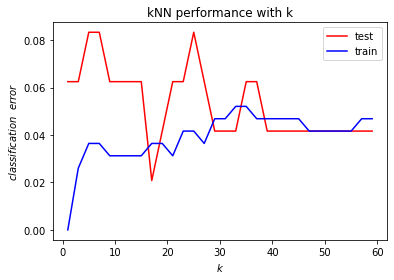

In [3]:
# divide the data in train and test
# measure the error of kNN for different values of k

from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

def knn_classifier_score(k,X_train,y_train,X_test,y_test):
    model=kNN(n_neighbors=k).fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([1-acc(y_test,y_test_pred),
                     1-acc(y_train,y_train_pred)])


test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, 
                                                    random_state = 0)

k_values=np.arange(1,61,2)

errors = map(lambda k: knn_classifier_score(k,X_train,y_train,X_test,y_test),k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plt.xlabel('$k$')
plt.ylabel('$classification~~error$')
plt.title('kNN performance with k')
plt.plot(k_values,test_error,color='red')
plt.plot(k_values,train_error,color='blue')
plt.legend(['test','train']);

# What do we observe?

- How does test evolve with $k$?
- How does train evolve with $k$?
- Do we observe underfitting?
- Do we observe overfitting?


# Bibliography

- Hastie, T., Tibshirani, R., Friedman, J. (2008). The Elements of Statistical Learning, Second Edition. New York, NY, USA: Springer New York Inc.
- An Introduction to Statistical Learning, James, Witten, Hastie, Tibshirani. Springer. 